#**Trabalho Incêndios florestais e secas no Brasil**
## Inteligencia Artificial
## **Guilherme Teixeira Silva**
### Ciência de Dados - 1º Semestre


# Este projeto utiliza dados do Instituto Nacional de Pesquisas Espaciais (INPE)
https://www.kaggle.com/datasets/mayaravalliero/fire-watch-brazil-2024

  Para fornecer informações detalhadas sobre ocorrências de incêndios florestais e precipitação em todo o Brasil.
  O conjunto de dados inclui informações essenciais, como o número de hotspots de incêndios florestais,número médio de dias secos e risco de incêndio, oferecendo uma visão abrangente da situação climática atual.


## Colunas

* Data

---


      Representa a data em que foram tomadas observações ou medições.
    Representa o mês e o ano em que as observações ou medições foram tomadas.
* Municipio

---
      Refere-se ao município específico onde os dados foram coletados.
    Permite uma análise mais detalhada a nível local.
* Estado

---


      Indica o nome do estado onde os dados foram coletados.
    Esta coluna ajuda a agrupar e analisar dados por regiões administrativas maiores.
* Bioma

---
      Classifica o tipo de bioma presente na área onde os dados foram coletados.
    Exemplos de biomas incluem floresta tropical, savana e tundra.
    Esta informação é importante para a compreensão do impacto das
    variáveis climáticas e ambientais em diferentes ecossistemas.
* Avg_numero_dias_sem_chuva

---
      Número médio de dias sem precipitação durante o período analisado.
    Esta métrica ajuda a entender a frequência e duração dos períodos de seca.
* Avg_precipitacao
---
      Quantidade média de precipitação (chuva, neve, etc.) registrada durante o período analisado.
    Esta coluna fornece uma visão geral da quantidade média de água que caiu na região.
* Avg_risco_fogo
---
      Risco médio de incêndio durante o período analisado. Este valor é calculado com base em fatores
      como umidade,temperatura e outras condições que influenciam o risco de incêndio.
* Avg_frp (Média de Poder Radiativo de Fogo)
---
      Representa o "Fire Radiative Power" (Poder Radiativo do Fogo), uma métrica usada para medir a
    intensidade de energia liberada pelos incêndios.
      Essa métrica ajuda a entender a intensidade dos incêndios e seu impacto ambiental,uma vez que o
    poder radiativo está relacionado com a quantidade de biomassa queimada e, consequentemente, com a
    liberação de carbono e outros poluentes na atmosfera.





##Tratando os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import localizacao as lcl

arquivo="/content/Dataset_FireWatch_Brazil_Q3_2024.csv"
dados=pd.read_csv(arquivo)
(dados)

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-09-24,CAAPIRANGA,AMAZONAS,Amazônia,0.00,0.0,0.00,11.00
1,2024-09-24,NOVA OLINDA DO NORTE,AMAZONAS,Amazônia,0.00,0.0,0.00,18.89
2,2024-09-24,DOM ELISEU,PARÁ,Amazônia,0.00,0.0,0.00,19.24
3,2024-09-24,NOVO ARIPUANÃ,AMAZONAS,Amazônia,0.00,0.0,0.00,46.17
4,2024-09-24,ELDORADO DO CARAJÁS,PARÁ,Amazônia,0.00,0.0,0.00,14.93
...,...,...,...,...,...,...,...,...
78512,2024-07-01,RIO VERDE,GOIÁS,Cerrado,76.25,0.0,100.00,17.50
78513,2024-07-01,CIDADE OCIDENTAL,GOIÁS,Cerrado,60.60,0.0,20.00,27.60
78514,2024-07-01,APARECIDA DE GOIÂNIA,GOIÁS,Cerrado,75.00,0.0,0.00,12.50
78515,2024-07-01,NOVO GAMA,GOIÁS,Cerrado,80.00,0.0,0.00,34.00


In [ ]:
dados.columns= ["Data","Municipio","Estado","Bioma", "Media_numero_dias_sem_chuva","Media_precipitacao","Media_risco_fogo","Avg_fire_radiative_power"]

(dados.head(20))

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
0,2024-09-24,CAAPIRANGA,AMAZONAS,Amazônia,0.0,0.0,0.0,11.00
1,2024-09-24,NOVA OLINDA DO NORTE,AMAZONAS,Amazônia,0.0,0.0,0.0,18.89
2,2024-09-24,DOM ELISEU,PARÁ,Amazônia,0.0,0.0,0.0,19.24
3,2024-09-24,NOVO ARIPUANÃ,AMAZONAS,Amazônia,0.0,0.0,0.0,46.17
4,2024-09-24,ELDORADO DO CARAJÁS,PARÁ,Amazônia,0.0,0.0,0.0,14.93
5,2024-09-24,JATOBÁ,MARANHÃO,Cerrado,0.0,0.0,0.0,29.64
6,2024-09-24,SÃO FÉLIX DO XINGU,PARÁ,Amazônia,0.0,0.0,0.0,7.87
7,2024-09-24,MIRADOR,MARANHÃO,Cerrado,0.0,0.0,0.0,35.66
8,2024-09-24,MANICORÉ,AMAZONAS,Amazônia,0.0,0.0,0.0,24.88
9,2024-09-24,ALTAMIRA,PARÁ,Amazônia,0.0,0.0,0.0,32.00


In [ ]:
dados.loc[13550:13570]

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
13550,2024-09-14,GOIANDIRA,GOIÁS,Cerrado,0.00,0.0,0.0,42.00
13551,2024-09-14,CRISTALINA,GOIÁS,Cerrado,0.00,0.0,0.0,120.33
13552,2024-09-14,FORMOSA,GOIÁS,Cerrado,0.00,0.0,0.0,417.67
13553,2024-09-14,BOM JARDIM DE GOIÁS,GOIÁS,Cerrado,0.00,0.0,0.0,74.10
13554,2024-09-14,QUIRINÓPOLIS,GOIÁS,Cerrado,0.00,0.0,0.0,351.57
13555,2024-09-14,PORANGATU,GOIÁS,Cerrado,0.00,0.0,0.0,132.13
13556,2024-09-14,CAMPINORTE,GOIÁS,Cerrado,0.00,0.0,0.0,178.50
13557,2024-09-14,VALPARAÍSO DE GOIÁS,GOIÁS,Cerrado,0.00,0.0,0.0,9.00
13558,2024-09-14,ARAGUAPAZ,GOIÁS,Cerrado,0.00,0.0,0.0,72.00
13559,2024-09-14,MARZAGÃO,GOIÁS,Cerrado,0.00,0.0,0.0,84.00


In [ ]:
dados=dados.iloc[13567: ].reset_index(drop=True)

dados.drop_duplicates(inplace=True)
(dados.tail(15))


,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
64935,2024-07-01,CRISTALINA,GOIÁS,Cerrado,57.67,0.0,100.00,71.67
64936,2024-07-01,FORMOSA,GOIÁS,Cerrado,51.50,0.0,100.00,26.50
64937,2024-07-01,CÓRREGO DO OURO,GOIÁS,Cerrado,74.00,0.0,96.00,114.00
64938,2024-07-01,UIRAPURU,GOIÁS,Cerrado,26.00,0.0,100.00,44.00
64939,2024-07-01,ANÁPOLIS,GOIÁS,Cerrado,74.00,0.0,0.00,45.00
64940,2024-07-01,PALMEIRAS DE GOIÁS,GOIÁS,Cerrado,75.00,0.0,100.00,109.00
64941,2024-07-01,SÃO DOMINGOS,GOIÁS,Cerrado,33.00,0.0,100.00,382.58
64942,2024-07-01,ALTO PARAÍSO DE GOIÁS,GOIÁS,Cerrado,26.00,0.0,100.00,49.25
64943,2024-07-01,URUAÇU,GOIÁS,Cerrado,26.00,0.0,100.00,68.00
64944,2024-07-01,ABADIÂNIA,GOIÁS,Cerrado,68.00,0.0,100.00,40.00


In [ ]:
(dados["Municipio"].unique())

array(['CANDEIAS DO JAMARI', 'VILHENA', 'CACOAL', ..., 'SANTO INÁCIO',
       'FLORESTÓPOLIS', 'BALNEÁRIO CAMBORIÚ'], dtype=object)

In [ ]:
(dados["Municipio"].unique().shape)

(4697,)

In [ ]:
(dados["Bioma"].unique())

array(['Amazônia', 'Cerrado', 'Caatinga', 'Mata Atlântica', 'Pampa',
       'Pantanal'], dtype=object)

In [ ]:
(dados["Estado"].unique())

array(['RONDÔNIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARÁ', 'AMAPÁ',
       'TOCANTINS', 'MARANHÃO', 'PIAUÍ', 'CEARÁ', 'RIO GRANDE DO NORTE',
       'PARAÍBA', 'PERNAMBUCO', 'ALAGOAS', 'SERGIPE', 'BAHIA',
       'MINAS GERAIS', 'ESPÍRITO SANTO', 'RIO DE JANEIRO', 'SÃO PAULO',
       'PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL',
       'MATO GROSSO DO SUL', 'MATO GROSSO', 'GOIÁS', 'DISTRITO FEDERAL'],
      dtype=object)

In [ ]:
(dados["Estado"].value_counts())

,count
Estado,
MINAS GERAIS,10734
MARANHÃO,5751
PARÁ,5162
SÃO PAULO,5091
MATO GROSSO,4852
BAHIA,3979
TOCANTINS,3676
GOIÁS,3515
PIAUÍ,3007


In [ ]:
(dados.max())

,0
Data,2024-09-09
Municipio,ÓLEO
Estado,TOCANTINS
Bioma,Pantanal
Media_numero_dias_sem_chuva,120.0
Media_precipitacao,4785.51
Media_risco_fogo,100.0
Avg_fire_radiative_power,9300.57


In [ ]:
(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64950 entries, 0 to 64949
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         64950 non-null  object 
 1   Municipio                    64950 non-null  object 
 2   Estado                       64950 non-null  object 
 3   Bioma                        64950 non-null  object 
 4   Media_numero_dias_sem_chuva  64950 non-null  float64
 5   Media_precipitacao           64950 non-null  float64
 6   Media_risco_fogo             64950 non-null  float64
 7   Avg_fire_radiative_power     64950 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.0+ MB


In [ ]:
(dados.describe())

,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
count,64950.000000,64950.000000,64950.000000,64950.000000
mean,43.119582,12.351415,80.784062,140.369258
std,37.776983,102.649871,31.704751,221.990032
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,73.000000,33.330000
50%,31.000000,0.000000,100.000000,64.130000
75%,74.000000,0.000000,100.000000,140.347500
max,120.000000,4785.510000,100.000000,9300.570000


In [ ]:
(dados.idxmax()["Avg_fire_radiative_power"])

29066

In [ ]:
(dados.loc[29066])

,29066
Data,2024-08-08
Municipio,FRANCISCO SANTOS
Estado,PIAUÍ
Bioma,Caatinga
Media_numero_dias_sem_chuva,32.0
Media_precipitacao,0.0
Media_risco_fogo,100.0
Avg_fire_radiative_power,9300.57


In [ ]:
(dados.nlargest(5, "Avg_fire_radiative_power"))

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
29066,2024-08-08,FRANCISCO SANTOS,PIAUÍ,Caatinga,32.0,0.0,100.0,9300.57
9935,2024-09-04,SÃO JOSÉ DO RIO CLARO,MATO GROSSO,Cerrado,19.0,0.0,100.0,5482.33
30784,2024-08-07,PRATA,MINAS GERAIS,Cerrado,111.5,0.0,100.0,4925.75
4507,2024-09-07,PARISI,SÃO PAULO,Mata Atlântica,12.5,0.0,100.0,4217.50
21171,2024-08-15,TURMALINA,MINAS GERAIS,Cerrado,120.0,0.0,100.0,4088.92


In [ ]:
(dados.nlargest(5, "Media_numero_dias_sem_chuva"))

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power
259,2024-09-09,NOVO JARDIM,TOCANTINS,Cerrado,120.0,0.0,100.0,84.33
266,2024-09-09,SILVANÓPOLIS,TOCANTINS,Cerrado,120.0,0.0,100.0,41.00
511,2024-09-09,PARNAGUÁ,PIAUÍ,Cerrado,120.0,0.0,100.0,1501.00
662,2024-09-09,CRISTÓPOLIS,BAHIA,Cerrado,120.0,0.0,100.0,31.60
665,2024-09-09,CATOLÂNDIA,BAHIA,Cerrado,120.0,0.0,100.0,375.65


## Gerando Gráficos

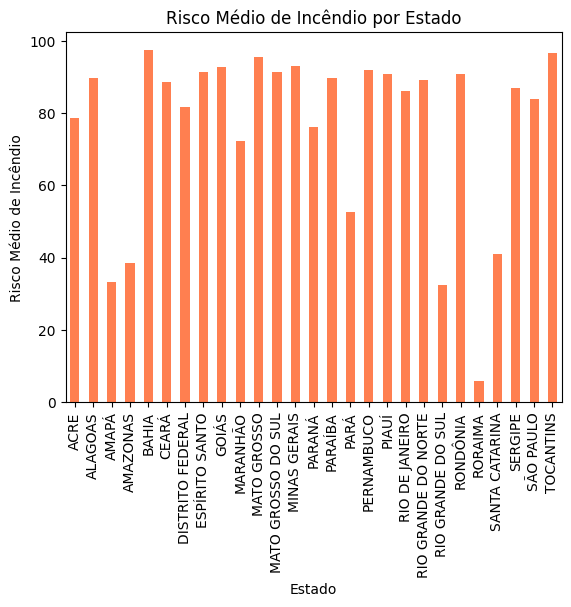

In [ ]:
media_risco_estado = dados.groupby("Estado")["Media_risco_fogo"].mean()
media_risco_estado.plot(kind="bar", color="coral")
plt.xlabel("Estado")
plt.ylabel("Risco Médio de Incêndio")
plt.title("Risco Médio de Incêndio por Estado")
plt.show()

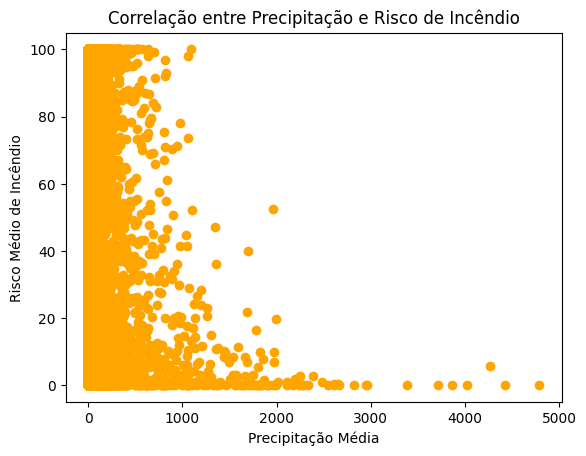

In [ ]:
plt.scatter(dados["Media_precipitacao"], dados["Media_risco_fogo"], color="Orange")
plt.xlabel("Precipitação Média")
plt.ylabel("Risco Médio de Incêndio")
plt.title("Correlação entre Precipitação e Risco de Incêndio")
plt.show()

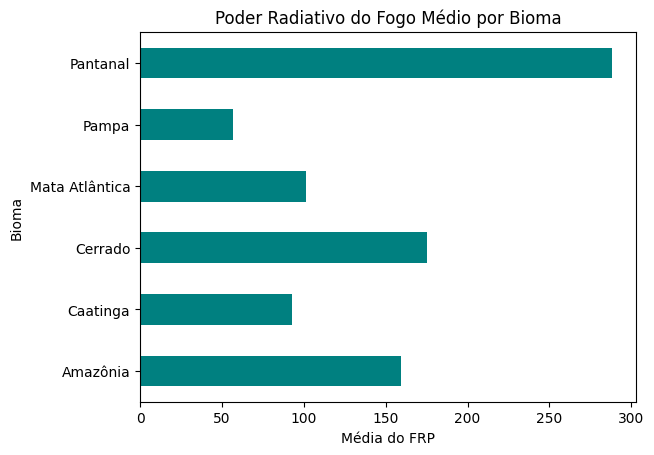

In [ ]:
media_frp_bioma = dados.groupby("Bioma")["Avg_fire_radiative_power"].mean()
media_frp_bioma.plot(kind="barh", color="teal")
plt.xlabel("Média do FRP")
plt.ylabel("Bioma")
plt.title("Poder Radiativo do Fogo Médio por Bioma")
plt.show()

## Localizacao


In [ ]:
import pandas as pd

arquivo2= "/content/municipios.csv"

In [ ]:
# Por questão do formataçao do arquivo csv estar com encoder não habitual(UTF-8), é necessário mudar para latin-1.
# Com o comando (on_bad_lines="warn"), ele irá me listar possiveis erros no csv, mas irá prosseguir com a depuração.
localizacao=pd.read_csv(arquivo2,encoding="latin-1", on_bad_lines="warn")
(localizacao)

<ipython-input-79-8238a4977c69>:3: ParserWarning: Skipping line 1775: expected 8 fields, saw 10

  localizacao=pd.read_csv(arquivo2,encoding="latin-1", on_bad_lines="warn")


,codigo_ibge,municipio,latitude,longitude,capital,codigo_uf,siafi_id,ddd
0,5200050,Abadia de Goias,-16.75730,-49.4412,False,52,1050,62
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,False,31,4001,34
2,5200100,Abadiânia,-16.19700,-48.7057,False,52,9201,62
3,3100203,Abaeté,-19.15510,-45.4444,False,31,4003,37
4,1500107,Abaetetuba,-1.72183,-48.8788,False,15,401,91
...,...,...,...,...,...,...,...,...
5564,2933604,Xique-Xique,-10.82300,-42.7245,False,29,3971,74
5565,2517407,Zabelê,-8.07901,-37.1057,False,25,542,83
5566,3557154,Zacarias,-21.05060,-50.0552,False,35,2973,18
5567,2114007,Zé Doca,-3.27014,-45.6553,False,21,1287,98


In [ ]:
# Para ter uma semelhança entre o nome das colunas dos dois DataSet's irei atribuir a todos os cados na coluna municipios o comando upper para deixa-los em " Caixa Alta".
localizacao["municipio"]=localizacao["municipio"].str.upper()
(localizacao)

,codigo_ibge,municipio,latitude,longitude,capital,codigo_uf,siafi_id,ddd
0,5200050,ABADIA DE GOIAS,-16.75730,-49.4412,False,52,1050,62
1,3100104,ABADIA DOS DOURADOS,-18.48310,-47.3916,False,31,4001,34
2,5200100,ABADIÂNIA,-16.19700,-48.7057,False,52,9201,62
3,3100203,ABAETÉ,-19.15510,-45.4444,False,31,4003,37
4,1500107,ABAETETUBA,-1.72183,-48.8788,False,15,401,91
...,...,...,...,...,...,...,...,...
5564,2933604,XIQUE-XIQUE,-10.82300,-42.7245,False,29,3971,74
5565,2517407,ZABELÊ,-8.07901,-37.1057,False,25,542,83
5566,3557154,ZACARIAS,-21.05060,-50.0552,False,35,2973,18
5567,2114007,ZÉ DOCA,-3.27014,-45.6553,False,21,1287,98


In [ ]:
# Após isso irei remover as colunas que não serão importantes para eu proceguir com a analise.
localizacao.drop(columns=["codigo_ibge","capital","codigo_uf","siafi_id","ddd"],inplace=True)
(localizacao)

,municipio,latitude,longitude
0,ABADIA DE GOIAS,-16.75730,-49.4412
1,ABADIA DOS DOURADOS,-18.48310,-47.3916
2,ABADIÂNIA,-16.19700,-48.7057
3,ABAETÉ,-19.15510,-45.4444
4,ABAETETUBA,-1.72183,-48.8788
...,...,...,...
5564,XIQUE-XIQUE,-10.82300,-42.7245
5565,ZABELÊ,-8.07901,-37.1057
5566,ZACARIAS,-21.05060,-50.0552
5567,ZÉ DOCA,-3.27014,-45.6553


In [ ]:
# Por fim irei renomear as colunar restantes para seguir um padrão como o primeiro DataSet.
localizacao.columns=["Municipio","Latitude","Longitude"]
localizacao.drop_duplicates(inplace=True)
(localizacao)


,Municipio,Latitude,Longitude
0,ABADIA DE GOIAS,-16.75730,-49.4412
1,ABADIA DOS DOURADOS,-18.48310,-47.3916
2,ABADIÂNIA,-16.19700,-48.7057
3,ABAETÉ,-19.15510,-45.4444
4,ABAETETUBA,-1.72183,-48.8788
...,...,...,...
5564,XIQUE-XIQUE,-10.82300,-42.7245
5565,ZABELÊ,-8.07901,-37.1057
5566,ZACARIAS,-21.05060,-50.0552
5567,ZÉ DOCA,-3.27014,-45.6553


In [ ]:
(localizacao.describe())

,Latitude,Longitude
count,5569.000000,5569.000000
mean,-16.451365,-46.233494
std,8.286295,6.406476
min,-33.686600,-72.899700
25%,-22.844200,-50.879300
50%,-18.096500,-46.525100
75%,-8.496550,-41.411300
max,4.603140,-34.815100


In [ ]:
(localizacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Municipio  5569 non-null   object 
 1   Latitude   5569 non-null   float64
 2   Longitude  5569 non-null   float64
dtypes: float64(2), object(1)
memory usage: 130.6+ KB


In [ ]:
(lcl.localizacao)

,Municipio,Latitude,Longitude
0,ABADIA DE GOIAS,-16.75730,-49.4412
1,ABADIA DOS DOURADOS,-18.48310,-47.3916
2,ABADIÂNIA,-16.19700,-48.7057
3,ABAETÉ,-19.15510,-45.4444
4,ABAETETUBA,-1.72183,-48.8788
...,...,...,...
5564,XIQUE-XIQUE,-10.82300,-42.7245
5565,ZABELÊ,-8.07901,-37.1057
5566,ZACARIAS,-21.05060,-50.0552
5567,ZÉ DOCA,-3.27014,-45.6553


##Dados_loc


In [ ]:
dados_loc=pd.merge(dados,lcl.localizacao,how="left",left_on=["Municipio"],right_on=["Municipio"])
dados_loc

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power,Latitude,Longitude
0,2024-09-09,CANDEIAS DO JAMARI,RONDÔNIA,Amazônia,20.28,0.0,100.00,285.05,-8.7907,-63.7005
1,2024-09-09,VILHENA,RONDÔNIA,Amazônia,92.83,0.0,100.00,89.66,-12.7502,-60.1488
2,2024-09-09,CACOAL,RONDÔNIA,Amazônia,95.80,0.0,100.00,68.60,-11.4343,-61.4562
3,2024-09-09,CEREJEIRAS,RONDÔNIA,Amazônia,4.00,0.0,100.00,36.00,-13.1870,-60.8168
4,2024-09-09,SÃO MIGUEL DO GUAPORÉ,RONDÔNIA,Amazônia,49.33,0.0,100.00,93.00,-11.6953,-62.7192
...,...,...,...,...,...,...,...,...,...,...
71512,2024-07-01,RIO VERDE,GOIÁS,Cerrado,76.25,0.0,100.00,17.50,-17.7923,-50.9192
71513,2024-07-01,CIDADE OCIDENTAL,GOIÁS,Cerrado,60.60,0.0,20.00,27.60,-16.0765,-47.9252
71514,2024-07-01,APARECIDA DE GOIÂNIA,GOIÁS,Cerrado,75.00,0.0,0.00,12.50,-16.8198,-49.2469
71515,2024-07-01,NOVO GAMA,GOIÁS,Cerrado,80.00,0.0,0.00,34.00,-16.0592,-48.0417


In [ ]:
dados_loc.dropna(inplace=True)
dados_loc

,Data,Municipio,Estado,Bioma,Media_numero_dias_sem_chuva,Media_precipitacao,Media_risco_fogo,Avg_fire_radiative_power,Latitude,Longitude
0,2024-09-09,CANDEIAS DO JAMARI,RONDÔNIA,Amazônia,20.28,0.0,100.00,285.05,-8.7907,-63.7005
1,2024-09-09,VILHENA,RONDÔNIA,Amazônia,92.83,0.0,100.00,89.66,-12.7502,-60.1488
2,2024-09-09,CACOAL,RONDÔNIA,Amazônia,95.80,0.0,100.00,68.60,-11.4343,-61.4562
3,2024-09-09,CEREJEIRAS,RONDÔNIA,Amazônia,4.00,0.0,100.00,36.00,-13.1870,-60.8168
4,2024-09-09,SÃO MIGUEL DO GUAPORÉ,RONDÔNIA,Amazônia,49.33,0.0,100.00,93.00,-11.6953,-62.7192
...,...,...,...,...,...,...,...,...,...,...
71512,2024-07-01,RIO VERDE,GOIÁS,Cerrado,76.25,0.0,100.00,17.50,-17.7923,-50.9192
71513,2024-07-01,CIDADE OCIDENTAL,GOIÁS,Cerrado,60.60,0.0,20.00,27.60,-16.0765,-47.9252
71514,2024-07-01,APARECIDA DE GOIÂNIA,GOIÁS,Cerrado,75.00,0.0,0.00,12.50,-16.8198,-49.2469
71515,2024-07-01,NOVO GAMA,GOIÁS,Cerrado,80.00,0.0,0.00,34.00,-16.0592,-48.0417


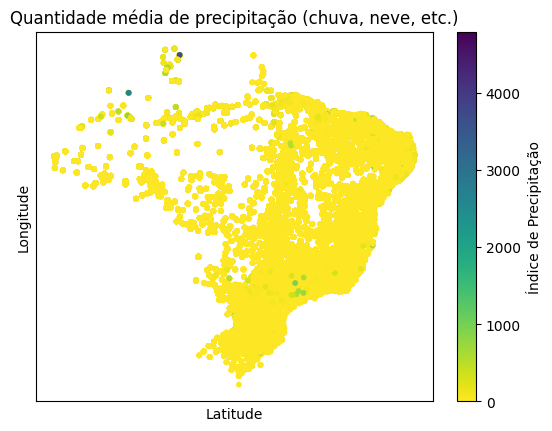

In [ ]:
plt.scatter(dados_loc["Longitude"],dados_loc["Latitude"],c=dados_loc["Media_precipitacao"],cmap=("viridis_r"),s=10 )
plt.colorbar(label="Índice de Precipitação")
plt.xlabel("Latitude")
plt.xticks([])
plt.ylabel("Longitude")
plt.yticks([])
plt.title("Quantidade média de precipitação (chuva, neve, etc.)")
plt.show()

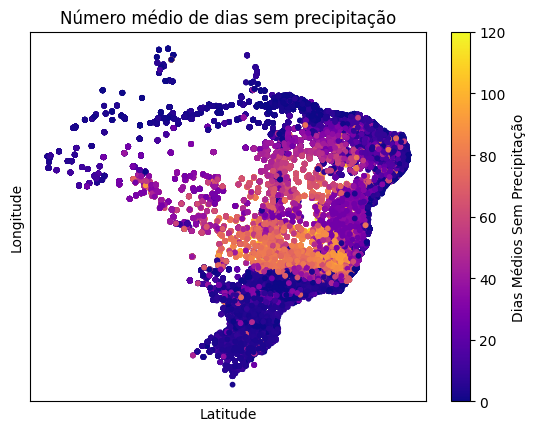

In [ ]:
plt.scatter(dados_loc["Longitude"],dados_loc["Latitude"],c=dados_loc["Media_numero_dias_sem_chuva"],cmap=("plasma"),s=10)
plt.colorbar(label= "Dias Médios Sem Precipitação")
plt.xlabel("Latitude")
plt.xticks([])
plt.ylabel("Longitude")
plt.yticks([])
plt.title("Número médio de dias sem precipitação")
plt.show()

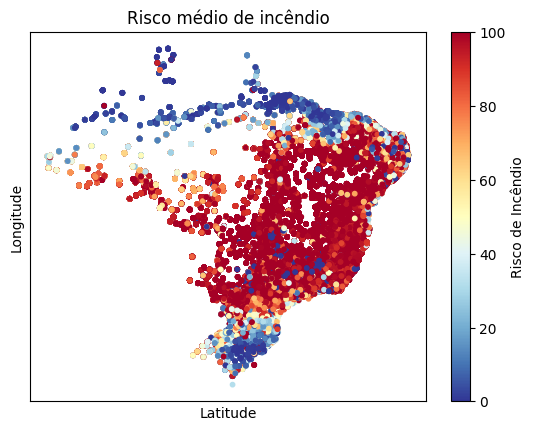

In [ ]:
plt.scatter(dados_loc["Longitude"],dados_loc["Latitude"],c=dados_loc["Media_risco_fogo"],cmap=("RdYlBu_r"),s=10 )
plt.colorbar(label="Risco de Incêndio")
plt.xlabel("Latitude")
plt.xticks([])
plt.ylabel("Longitude")
plt.yticks([])
plt.title("Risco médio de incêndio")
plt.show()
